# ROC and Precision-Recall Curves

This notebook produces the ROC and Precision-Recall curves for the optimally trained random forest models from Table1 and Table2. The results from these diagrams are evaluated in Appendix E to the report.

In [1]:
import joblib
import numpy as np
import pandas as pd
import sklearn
import warnings
warnings.filterwarnings(action = 'ignore')

In [2]:
table1_rf = joblib.load('Table1_random_forest.pkl')
table2_rf_easy = joblib.load('Table2_random_forest_easy.pkl')
table2_rf_medium = joblib.load('Table2_random_forest_medium.pkl')
table2_rf_hard = joblib.load('Table2_random_forest_hard.pkl')

In [3]:
new = pd.read_excel('Data1.xlsx', sheet_name = 'Table1 - Assessments')
new.set_index('Patient No. (ID)', inplace=True)
from sklearn.model_selection import train_test_split
X = new.drop(columns=['Output'])
y = new.Output
X_train_table1, X_test_table1, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)
def label_encoder(y):
    if y == 'Easy':
        return 1
    if y == 'Medium':
        return 2
    if y == 'Hard':
        return 3
y_train_table1 = y_train.apply(label_encoder)
y_test_table1 = y_test.apply(label_encoder)

In [4]:
import scikitplot as skplt
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

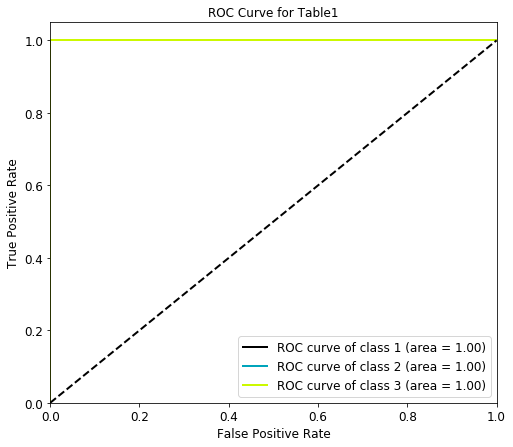

In [48]:
predictions_table1 = table1_rf.predict_proba(X_test_table1)
skplt.metrics.plot_roc(y_test_table1, predictions_table1, title='ROC Curve for Table1', figsize=(8,7), title_fontsize='large',
                      text_fontsize='large', plot_macro=False, plot_micro=False)

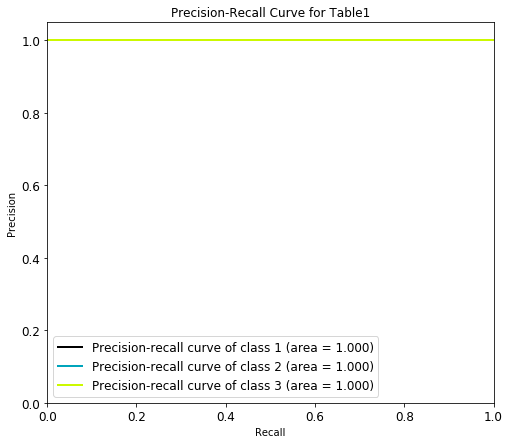

In [51]:
skplt.metrics.plot_precision_recall(y_test_table1, predictions_table1, title='Precision-Recall Curve for Table1', figsize=(8,7), title_fontsize='large',
                      text_fontsize='large', plot_micro=False)

In [7]:
new = pd.read_excel('Data2.xlsx', sheet_name = 'Table 2 - Games')
new.set_index('Patient No. (ID)', inplace=True)
new.drop(['# Possible Targets', 'Targets hit', 'Time per target / overall'], axis=1, inplace=True)
new.rename(columns={'Average hit time (s) (for successful hits)': 'Average hit time', 'Total time taken (s)': 'Time taken'}, inplace=True)
new = new.round({'Time taken' : 0, '% targets hit': 2, 'Average hit time' : 1})
easy_filter = new['Difficulty'] == 'Easy'
easy = new[easy_filter]
medium_filter = new['Difficulty'] == 'Medium'
medium = new[medium_filter]
hard_filter = new['Difficulty'] == 'Hard'
hard = new[hard_filter]
easy.drop(['Difficulty'], axis=1, inplace=True)
medium.drop(['Difficulty'], axis=1, inplace=True)
hard.drop(['Difficulty'], axis=1, inplace=True)
from sklearn.model_selection import train_test_split
X_easy = easy.drop(columns=['Output'])
y_easy = easy.Output
X_train_easy, X_test_easy, y_train_easy, y_test_easy = train_test_split(X_easy, y_easy, test_size=0.2, random_state=13)

X_medium = medium.drop(columns=['Output'])
y_medium = medium.Output
X_train_medium, X_test_medium, y_train_medium, y_test_medium = train_test_split(X_medium, y_medium, test_size=0.2, random_state=13)

X_hard = hard.drop(columns=['Output'])
y_hard = hard.Output
X_train_hard, X_test_hard, y_train_hard, y_test_hard = train_test_split(X_hard, y_hard, test_size=0.2, random_state=13)

In [8]:
predictions_easy = table2_rf_easy.predict_proba(X_test_easy)
predictions_medium = table2_rf_medium.predict_proba(X_test_medium)
predictions_hard = table2_rf_hard.predict_proba(X_test_hard)

In [9]:
predictions_table2 = [predictions_easy, predictions_medium, predictions_hard]
y_test_table2 = [y_test_easy, y_test_medium, y_test_hard]

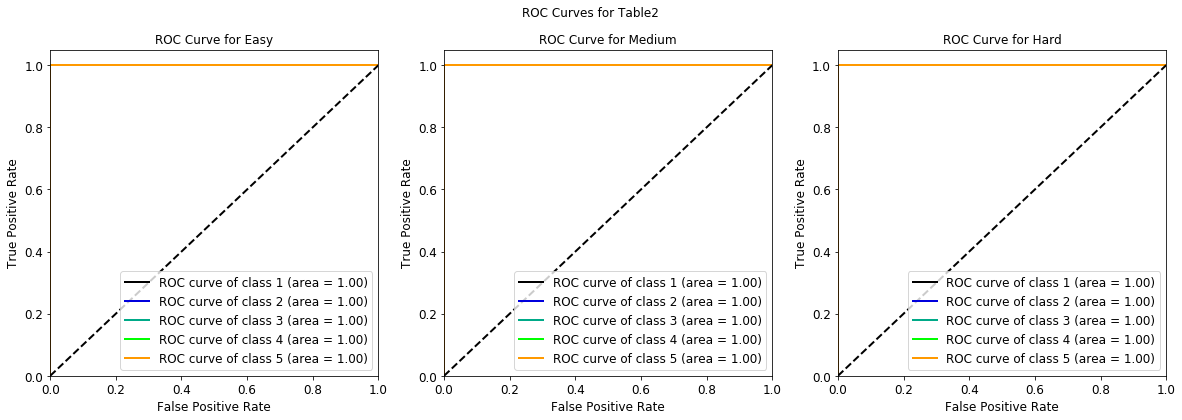

In [49]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 6))
fig.subplots_adjust(hspace=0.5)
fig.suptitle('ROC Curves for Table2')
for i, title in enumerate(['Easy', 'Medium', 'Hard']):
    skplt.metrics.plot_roc(y_test_table2[i], predictions_table2[i], ax=axes[i], title=f'ROC Curve for {title}', 
                           title_fontsize='large', text_fontsize='large', plot_macro=False, plot_micro=False)

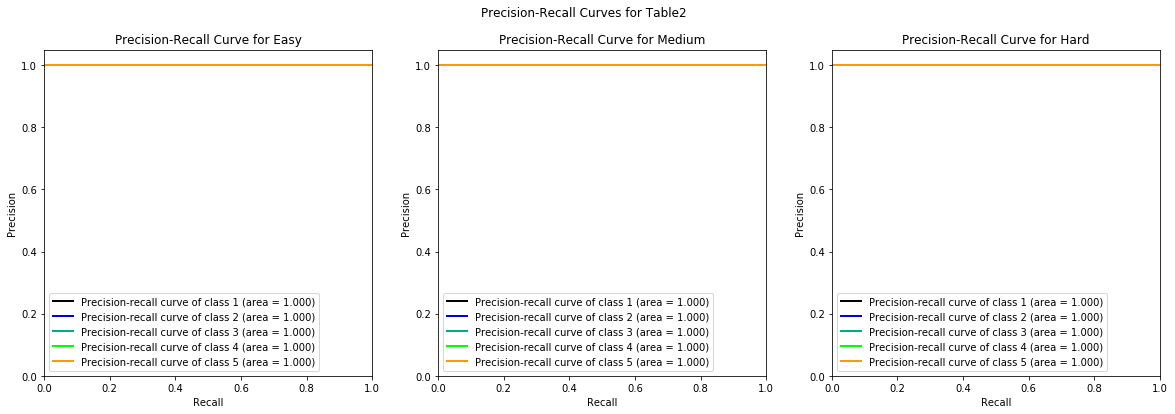

In [50]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 6))
fig.subplots_adjust(hspace=0.5)
fig.suptitle('Precision-Recall Curves for Table2')
for i, title in enumerate(['Easy', 'Medium', 'Hard']):
    skplt.metrics.plot_precision_recall(y_test_table2[i], predictions_table2[i], ax=axes[i], 
                                        title=f'Precision-Recall Curve for {title}', title_fontsize='large', 
                                        text_fontsize='medium', plot_micro=False)

In [65]:
new_predictions = table1_rf.predict([[10, 10, 90, 95]])
new_predictions[0]

3